In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

In [2]:
df = pd.read_csv("PCA_Customer_Data.csv")
df = df.drop('Unnamed: 0', axis=1)
df.head()

PC1       PC2       PC3       PC4       PC5       PC6
0 -0.230403 -0.012272  0.233339 -0.119963 -0.082365 -0.378263
1  0.372348  0.014527 -0.380164 -0.074397 -0.002281 -0.150753
2  0.437912  0.003296 -0.087938 -0.034842  0.038757 -0.078460
3  0.457492  0.004329 -0.081497 -0.018593  0.038919 -0.085442
4  0.228929 -0.027076  0.648573  0.066576  0.130170  0.150845

In [3]:
df.head()

PC1       PC2       PC3       PC4       PC5       PC6
0 -0.230403 -0.012272  0.233339 -0.119963 -0.082365 -0.378263
1  0.372348  0.014527 -0.380164 -0.074397 -0.002281 -0.150753
2  0.437912  0.003296 -0.087938 -0.034842  0.038757 -0.078460
3  0.457492  0.004329 -0.081497 -0.018593  0.038919 -0.085442
4  0.228929 -0.027076  0.648573  0.066576  0.130170  0.150845

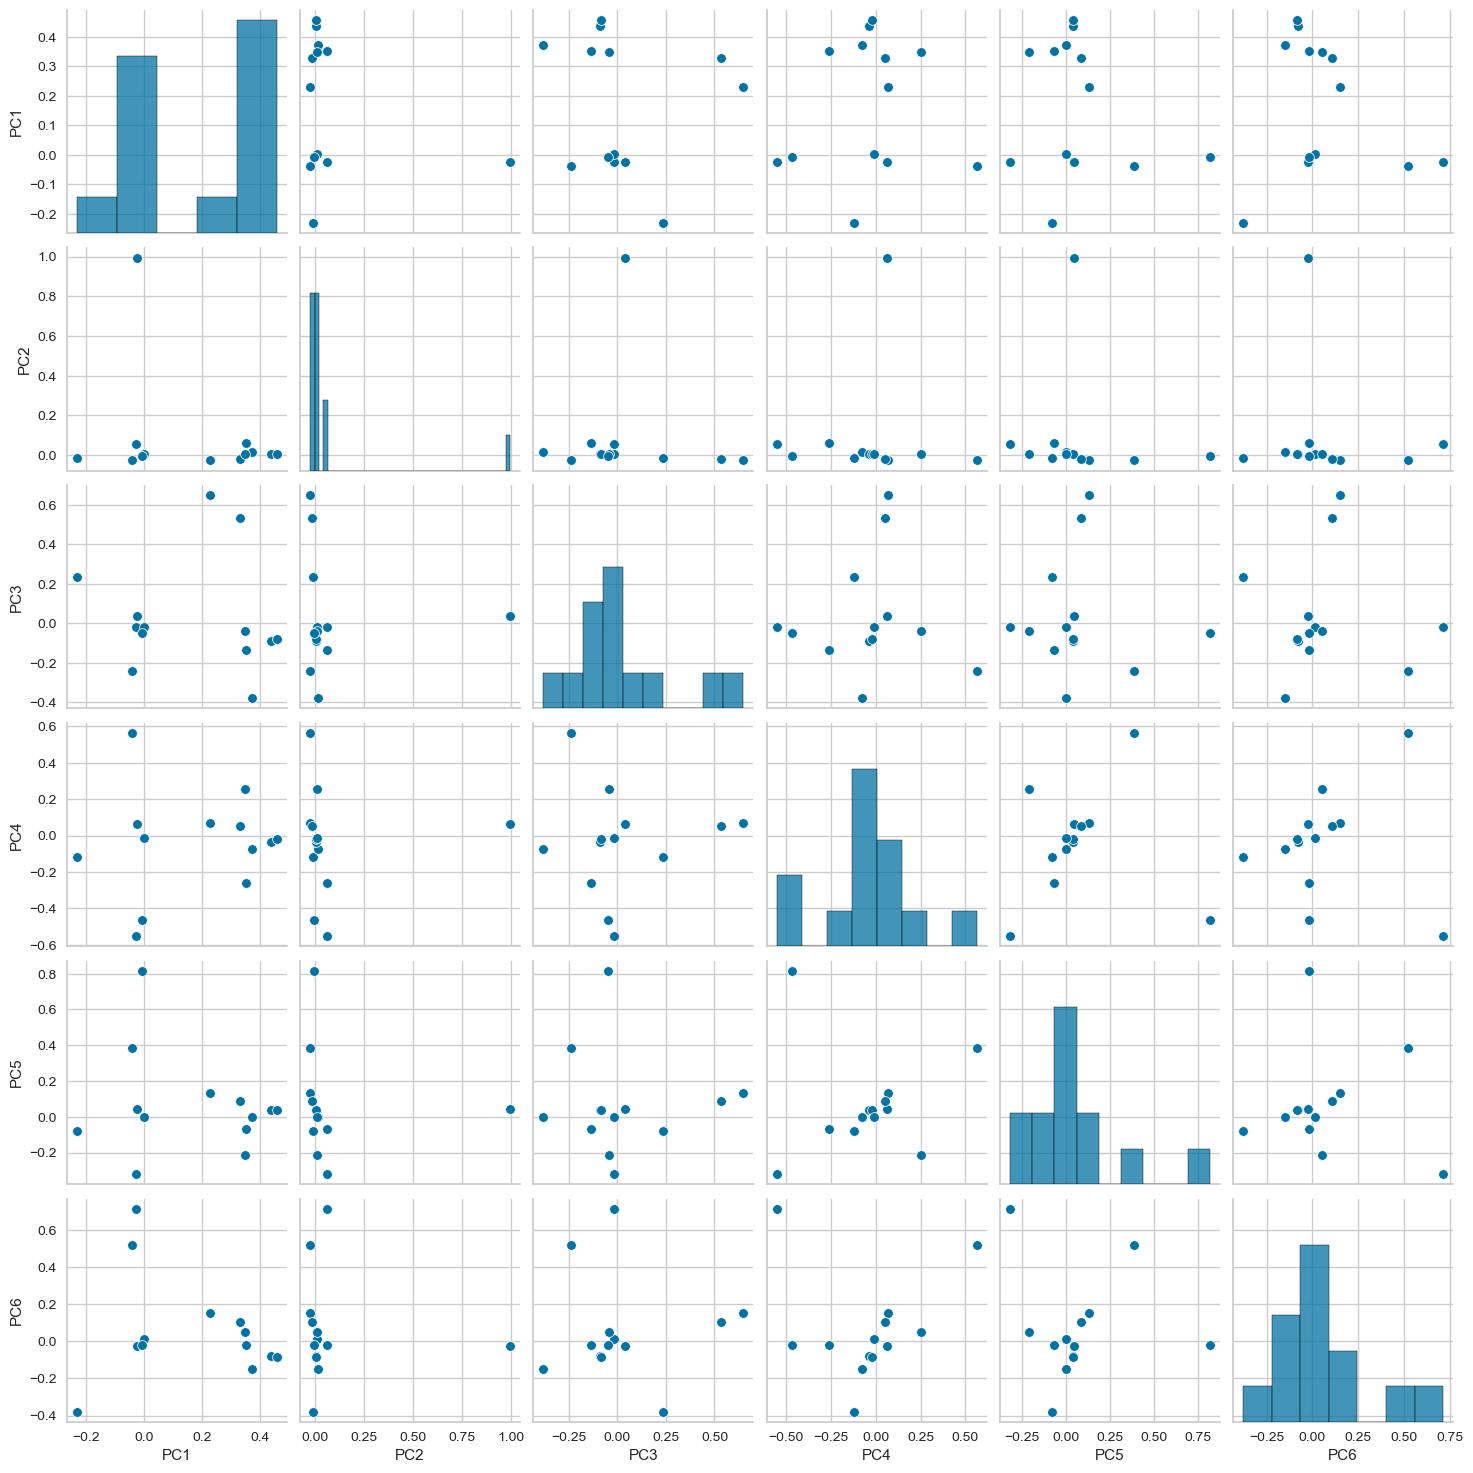

In [4]:
#Data Distribution

sns.pairplot(df)
plt.show()

In [5]:
scaled_df = StandardScaler().fit_transform(df) #scaling the dataframe


## Elbow Method

C:\Users\anish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\anish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

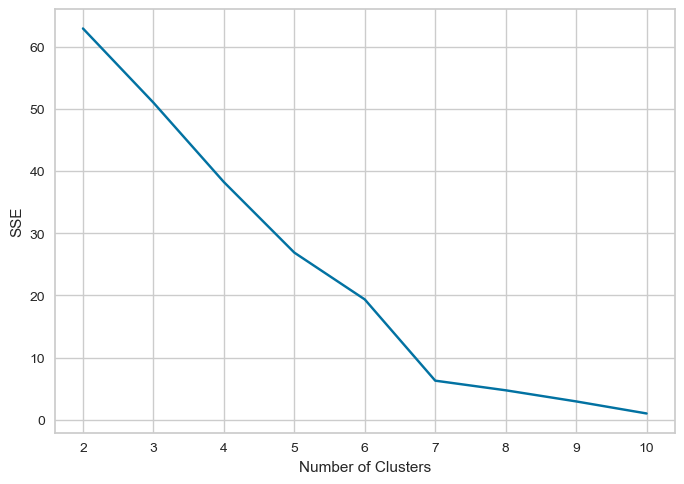

In [6]:
#kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}


sse = [] #sum of squared error list
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 11), sse)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

#### It is observed that there is a strong bend at 7.

### Alternate Library for elbow method

In [8]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(1,1), metric='calinski_harabasz', timings=False
)
visualizer.fit(scaled_df)        # Fit the data to the visualizer
visualizer.show()        

ValueError: cannot reshape array of size 0 into shape (0,newaxis)

In [9]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=7, n_init=10, random_state=1)
kmeans.fit(scaled_df)

C:\Users\anish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(init='random', n_clusters=7, n_init=10, random_state=1)